In [105]:
# packages

## Technical packages 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time
import random
import pandas as pd
import itertools
import scipy.stats
import math
import seaborn as sns

## Language packages
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import stopwords

In [117]:
########################################################
# Standard Functions
########################################################

def maketotal(dict_1):
    total = 0
    for item in dict_1:
        total += dict_1[item]
    return total  

def Jaccards(dict_1, dict_2):
    intersection = {} 
    for item in dict_1.keys():
        if item in dict_2.keys():
            intersection[item]=min(dict_1[item],dict_2[item])
            
    intersectiontot = maketotal(intersection)
    union = maketotal(dict_1) + maketotal(dict_2) - intersectiontot
    
    return intersectiontot/union

def time_it(somefunc,*arg,number_of_repeats=100,**kwarg):
    list_=[]

    #in each iteration the runtime of the function is noted and appended to a list
    for i in range(number_of_repeats):
        starttime = time.time()
        somefunc(*arg,**kwarg)
        endtime = time.time()
        list_.append(endtime-starttime)

    a = 0
    for i in list_:#finds the average of the list
        a += i

        mean = a/len(list_)

    return mean
    
def naiveCosine(vector_1,vector_2):
        numerator = 0
        for i in range(len(vector_1)):
            numerator += vector_1[i]*vector_2[i]

        norm_v1 = np.sqrt(np.sum(vector_1**2))
        norm_v2 = np.sqrt(np.sum(vector_1**2))

        denominator = norm_v1*norm_v2

        return round(numerator/denominator,6)


def cosine_dic(dic1,dic2):
    numerator = 0
    dena = 0
    for key1,val1 in dic1.items():
        numerator += val1*dic2.get(key1,0.0)
        dena += val1*val1
    denb = 0
    for val2 in dic2.values():
        denb += val2*val2
    return numerator/math.sqrt(dena*denb)


# def numpy_cosine(vector_1: np.array, vector_2: np.array):
#     numerator = np.dot(vector_1, vector_2)

#     norm_v1 = np.sqrt(np.sum(vector_1**2))
#     norm_v2 = np.sqrt(np.sum(vector_1**2))

#     denominator = norm_v1*norm_v2

#     return round(numerator/denominator,6)


In [240]:
# Generate variable leanght documents: 
class DocumentGenerator:
    def __init__(self,length = 1000,corpus = brown,include_filler_words = False,max_difference = False):

        if include_filler_words:
            self.word_reservoir = self.remove_punctuation(list(itertools.chain.from_iterable(corpus.sents()[:length]))) # does not remove stop words
        else:
            self.word_reservoir = self.remove_punctuation([word for word in list(itertools.chain.from_iterable(corpus.sents()[:length])) if word not in stopwords.words('english')]) # does remove stop words

        self.documents = []
        self.vector_pairs = []
        self.max_difference = max_difference


    def generate_documents(self, no_doc = 10,min_length = 50,max_length = 150):
        '''
        Generates a list of documents from the corpus/word reservoir and converts them
        into dictionaries of equal length which are then stored in a list of dictionaries.
        '''
        document_length = [int(x) for x in np.linspace(min_length,max_length,no_doc)]

        for i in document_length:
            document_pairs = []

            doc_1 = []
            doc_2 = []

            while len(set(doc_1)) < i:
                doc_1.append(random.choices(self.word_reservoir,k=1)[0])

            while len(set(doc_2)) < i:
                if self.max_difference:
                    word = random.choices(self.word_reservoir,k=1)[0]
                    if word in doc_1:
                        continue
                    else:
                        doc_2.append(word)
                else:
                    doc_2.append(random.choices(self.word_reservoir,k=1)[0])

            document_pairs.append((self.tokenize(doc_1)))
            document_pairs.append((self.tokenize(doc_2)))
        
            self.documents.append(document_pairs)

        return self.documents


    def convert_to_vectors(self):
        '''
        Converts the documents into vectors representations.
        '''
        for i in range(len(self.documents)):
            keys1 = list(self.documents[i][0].keys())
            keys2 = list(self.documents[i][1].keys())

            union = list(set(keys1 + keys2))

            v1 = []
            v2 = []

            for j in range(len(union)):
                if union[j] in self.documents[i][0].keys():
                    v1.append(self.documents[i][0][union[j]])
                else:
                    v1.append(0)

            for j in range(len(union)):
                if union[j] in self.documents[i][1].keys():
                    v2.append(self.documents[i][1][union[j]])
                else:
                    v2.append(0)

            self.vector_pairs.append([np.asarray(v1), np.asarray(v2)])

        return self.vector_pairs
    

            
    @staticmethod
    def remove_punctuation(docs):
        '''
        Removes punctuation from a list of words.
        '''
        for i in range(len(docs)):
            characters_to_remove = string.punctuation + string.digits 
            remove_table = str.maketrans('', '', characters_to_remove)
            docs[i] = docs[i].translate(remove_table)

        word_list = list(filter(None, docs))
        word_list = [x.lower() for x in word_list]

        return word_list

    @staticmethod
    def tokenize(l: list):
        '''
        Tokenizes a list of words into a dictionary.
        '''
        tokenized_dict = {}
        for i in range(len(l)):
            if l[i] in tokenized_dict:
                pass
            else:
                tokenized_dict[l[i]] = l.count(l[i])
            
        return tokenized_dict

In [246]:
DocumentGen = DocumentGenerator(length=1500,max_difference=True)
documents = DocumentGen.generate_documents(no_doc = 50,min_length = 50,max_length = 1000)
vectors = DocumentGen.convert_to_vectors()

In [247]:
cos_xs = []
cos_ys = []

for i in range(len(vectors)):
    cos_xs.append(len(vectors[i][0]))

for i in range(len(vectors)):
    cos_ys.append(time_it(naiveCosine, vectors[i][0],vectors[i][1]))



The empirical Analysis of the Jaccard Similarity has yielded a value of 0.833838234713469 for the slope and a value of 2.9733793139826613e-14 for the computer constant.


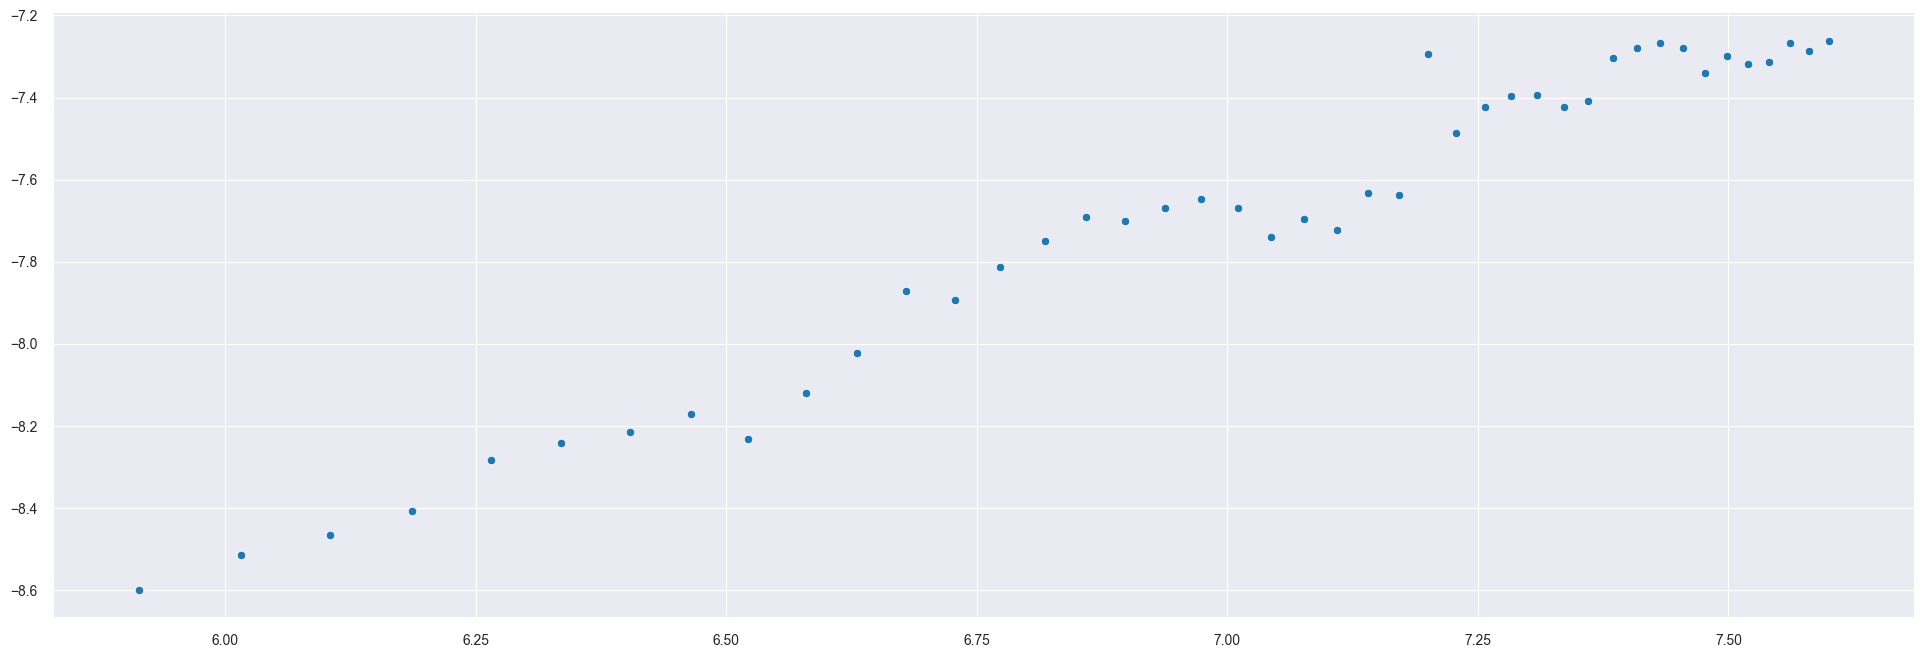

In [248]:
########################################################
# Plotting the results and summary staistics
########################################################


logx = [np.log(x) for x in cos_xs[7:]]
logy = [np.log(y) for y in cos_ys[7:]]

plt.figure(figsize=(24,8),dpi=100)
sns.set_style("darkgrid")
sns.scatterplot(x=logx, y=logy)
sns.despine(offset=5,trim=True)

slope,intercept, r_value, p_value ,std_err = scipy.stats.linregress(logx,logy)
computer_constant = np.power(10,intercept)

print(f'The empirical Analysis of the Jaccard Similarity has yielded a value of {slope} for the slope and a value of {computer_constant} for the computer constant.')

In [249]:
cos_xs_np = []
cos_ys_np = []

for i in range(len(vectors)):
    cos_xs_np.append(len(vectors[i][0]))

for i in range(len(vectors)):
    cos_ys_np.append(time_it(numpy_cosine, vectors[i][1],vectors[i][1]))

The empirical Analysis of the Jaccard Similarity has yielded a value of -0.0597491698065912 for the slope and a value of 2.2842054359181237e-11 for the computer constant.


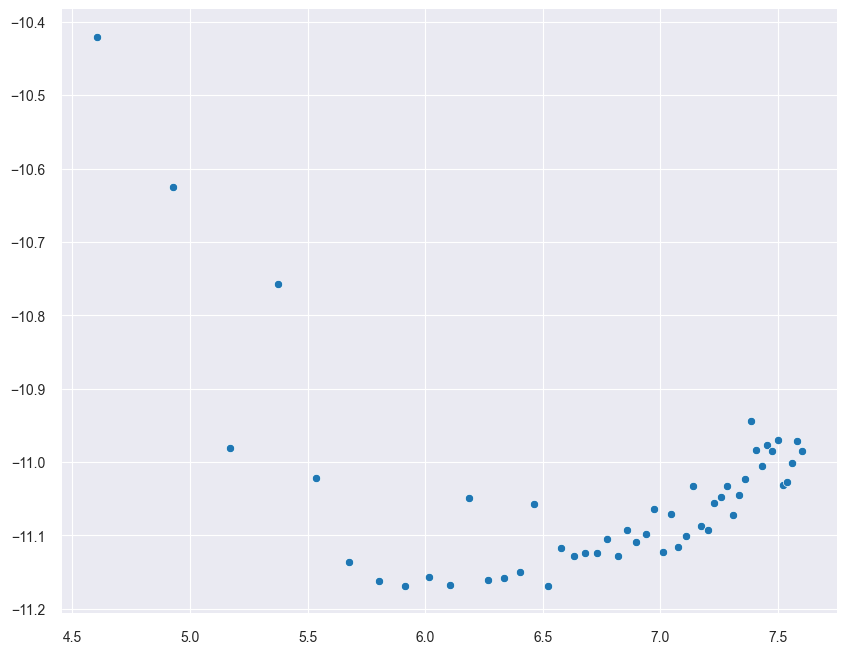

In [250]:
########################################################
# Plotting the results and summary staistics
########################################################
log_true = True

np_logx = [np.log(x) for x in cos_xs_np]
np_logy = [np.log(y) for y in cos_ys_np]

plt.figure(figsize=(10,8),dpi=100)
sns.set_style("darkgrid")

if log_true:
    sns.scatterplot(x=np_logx, y=np_logy)
    sns.despine(offset=5,trim=True)
else:
    sns.scatterplot(x=cos_xs_np, y=cos_ys_np)
    sns.despine(offset=5,trim=True)

slope_jaccard,intercept, r_value, p_value ,std_err = scipy.stats.linregress(np_logx,np_logy)
computer_constant = np.power(10,intercept)

print(f'The empirical Analysis of the Jaccard Similarity has yielded a value of {slope_jaccard} for the slope and a value of {computer_constant} for the computer constant.')